In [166]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [167]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [168]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import cv2
from tensorflow import keras

In [169]:
img=image.load_img(r"C:\Users\User\Desktop\image\Face\train\angry\7.jpeg")

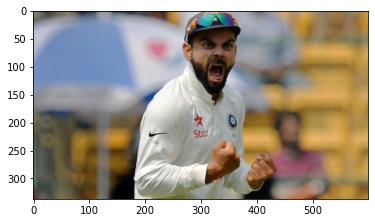

In [170]:
plt.imshow(img)
plt.show()

In [171]:
cv2.imread(r"C:\Users\User\Desktop\image\Face\train\angry\7.jpeg").shape

(337, 600, 3)

In [172]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [173]:
train_dataset=train.flow_from_directory(r"C:\Users\User\Desktop\image\Face\train",
                                        target_size=(200,200),
                                        batch_size=5,
                                        class_mode='binary')

Found 8 images belonging to 2 classes.


In [174]:
val_dataset=train.flow_from_directory(r"C:\Users\User\Desktop\image\Face\val",
                                        target_size=(200,200),
                                        batch_size=5,
                                        class_mode='binary')

Found 6 images belonging to 2 classes.


In [175]:
train_dataset.class_indices

{'angry': 0, 'happy': 1}

In [188]:
model=keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

In [182]:
model.compile(
optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [183]:
model.fit(train_dataset,
          steps_per_epoch=1,
          epochs=5,
         validation_data=val_dataset)

Epoch 1/5
1/1 [==============================] - 0s 479ms/step - loss: 0.5742 - accuracy: 0.6667 - val_loss: 1.4591 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 195ms/step - loss: 0.4230 - accuracy: 0.8000 - val_loss: 0.4995 - val_accuracy: 0.8333
Epoch 3/5
1/1 [==============================] - 0s 195ms/step - loss: 0.1315 - accuracy: 1.0000 - val_loss: 0.8437 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 217ms/step - loss: 0.1713 - accuracy: 1.0000 - val_loss: 0.7062 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 198ms/step - loss: 0.0756 - accuracy: 1.0000 - val_loss: 0.6192 - val_accuracy: 0.5000


1.jpg


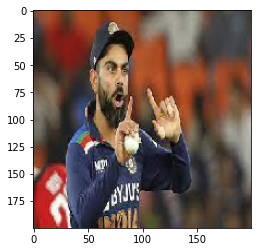

Angry Mode
10.jpg


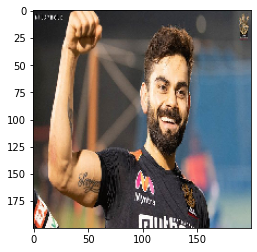

Angry Mode
2.jpg


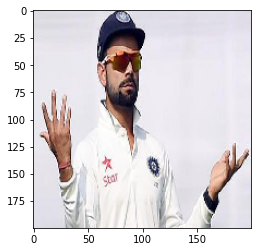

Angry Mode
3.jpg


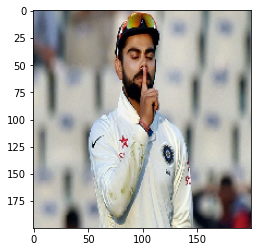

Angry Mode
8.jpg


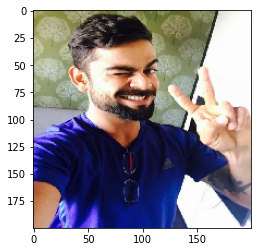

Angry Mode
9.jpg


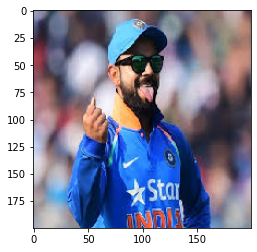

Angry Mode


In [184]:
dir_path=r"C:/Users/User/Desktop/image/Face/test"

for i in os.listdir(dir_path):
    print(i)
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    v=model.predict(images)
    if v==0:
        print("Angry Mode")
    else:
        print("Happy Mode")
